<a href="https://colab.research.google.com/github/158cs22009/assignment-1/blob/main/assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

data splitting

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_csv('/content/bostan housing.zip')

CHAS = df.drop('CHAS', axis=1)
RAD = df['CHAS']
# Split the data into training and testing sets
CHAS_train, CHAS_test, RAD_train, RAD_test = train_test_split(CHAS, RAD, test_size=0.3, random_state=40)

# Print the shapes of the splits
print("CHAS_train shape:", CHAS_train.shape)
print("CHAS_test shape:", CHAS_test.shape)
print("RAD_train shape:", RAD_train.shape)
print("RAD_test shape:", RAD_test.shape)

CHAS_train shape: (354, 13)
CHAS_test shape: (152, 13)
RAD_train shape: (354,)
RAD_test shape: (152,)


under fitting

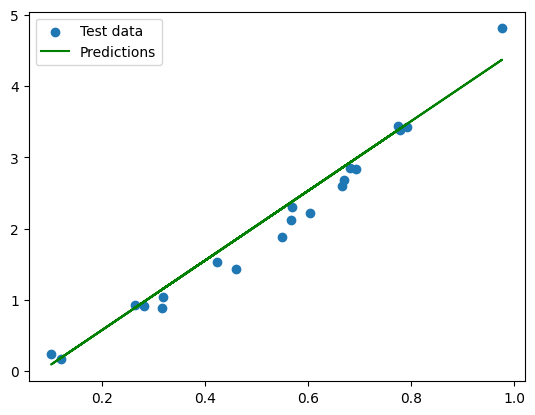

R-squared score: 0.9654420980023098


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('/content/bostan housing.zip')

np.random.seed(0)
CHAS = np.random.rand(100, 1)
RAD = 3 * CHAS**2 + 2 * CHAS + np.random.randn(100, 1) / 10

# Split the data into training and testing sets
CHAS_train, CHAS_test, RAD_train, RAD_test = train_test_split(CHAS, RAD, test_size=0.2, random_state=42)

# Create a simple linear regression model (too simple for the complex data)
model = LinearRegression()

# Train the model
model.fit(CHAS_train, RAD_train)

# Plot the results
plt.scatter(CHAS_test, RAD_test, label='Test data')
plt.plot(CHAS_test, model.predict(CHAS_test), label='Predictions', color='green')
plt.legend()
plt.show()

# Print the R-squared score (closer to 0 indicates underfitting)
print("R-squared score:", model.score(CHAS_test, RAD_test))

OVER FITTING

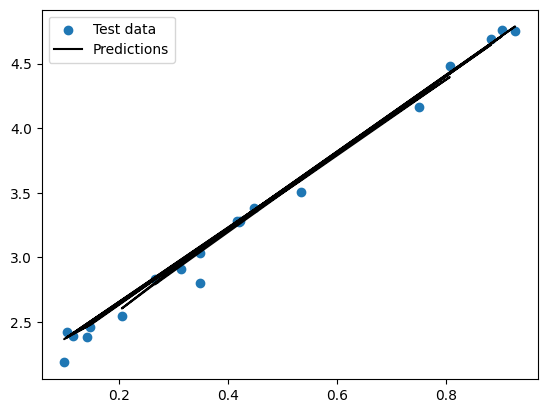

R-squared score: 0.9890812973931169


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('/content/bostan housing.zip')
np.random.seed(1)
CHAS = np.random.rand(100, 1)
RAD = 3 * CHAS + 2 + np.random.randn(100, 1) / 10

CHAS_train, CHAS_test, RAD_train, RAD_test = train_test_split(CHAS, RAD, test_size=0.2, random_state=42)

pipe = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10)),
    ('linear_regression', LinearRegression())
])
# Train the model
pipe.fit(CHAS_train, RAD_train)

plt.scatter(CHAS_test, RAD_test, label='Test data')
plt.plot(CHAS_test, pipe.predict(CHAS_test), label='Predictions', color='black')
plt.legend()
plt.show()

print("R-squared score:", pipe.score(CHAS_test, RAD_test))

DATA EXPLORATION

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  
(506, 14)
CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64
CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float6

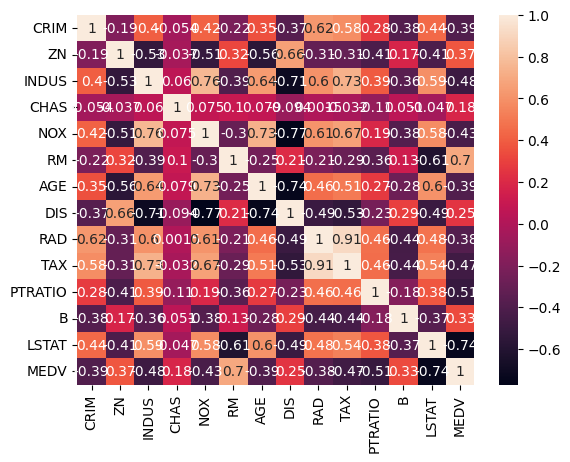

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("/content/bostan housing.zip")
numeric_columns=df.select_dtypes(include=[np.number]).columns
print(df.head())
print(df.shape)
print(df.isnull().sum())
print(df.dtypes)
print(df.describe())
if len(df.select_dtypes(include='object').columns) > 0:
  print(df.describe(include='object'))
corr_matrix=df[numeric_columns].corr()
print(corr_matrix)
sns.heatmap(corr_matrix,annot=True)
plt.show()

DATA PREPROCESSING

Mean Squared Error: 3641.1105947449028
Root Mean Squared Error: 60.34161577837391


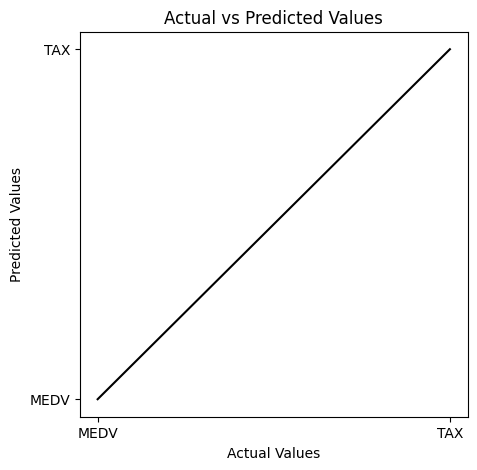

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer # Import SimpleImputer
import numpy as np

df = pd.read_csv("/content/bostan housing.zip")
x = df[['CHAS','CRIM']]
y = df[['MEDV','TAX']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create an imputer to fill NaN with the mean of each column
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both train and test data
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(x_train, y_train)
y_pred = rf_regressor.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", np.sqrt(mse))
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_pred, color='red', label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)],[min(y_test), max(y_test)], color='black')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

RANDOM FOREST REGRESSOR

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Feature importances: [1.]


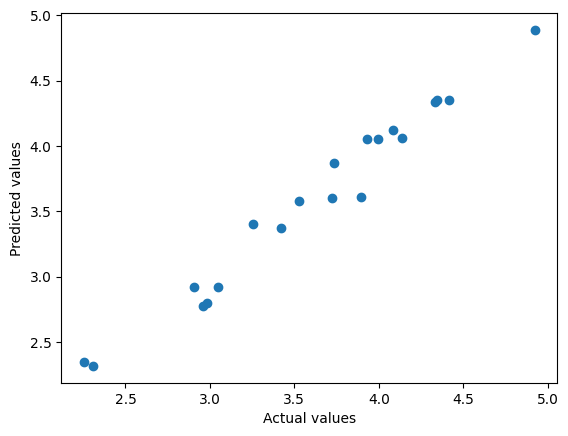

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_csv("/content/bostan housing.zip")
np.random.seed(0)
CHAS = np.random.rand(100, 1)
RAD = 3 * CHAS + 2 + np.random.randn(100, 1) / 10

CHAS_train, CHAS_test, RAD_train, RAD_test = train_test_split(CHAS, RAD, test_size=0.5, random_state=42)

model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)

model.fit(CHAS_train, RAD_train)

print("Feature importances:", model.feature_importances_)

RAD_pred = model.predict(CHAS_test)

plt.scatter(y_test, y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.show()

SUPPORT VECTOR

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Intercept: [2.01111939]
Coefficients: [[3.00602571]]


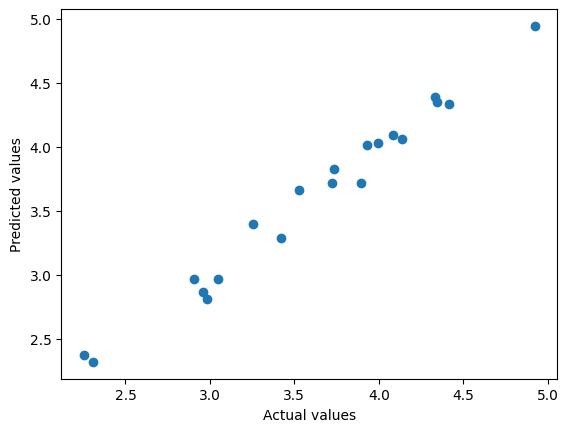

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
df=pd.read_csv("/content/bostan housing.zip")
np.random.seed(0)
ZN = np.random.rand(100, 1)
CRIM = 3 * ZN + 2 + np.random.randn(100, 1) / 10

ZN_train, ZN_test, CRIM_train, CRIM_test = train_test_split(ZN, CRIM, test_size=0.2, random_state=42)

model = SVR(kernel='linear', C=1e3)

model.fit(ZN_train, CRIM_train)

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

CRIM_pred = model.predict(ZN_test)

plt.scatter(CRIM_test, CRIM_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.show()

LASSO REGRESSOR

Intercept: [2.53316631]
Coefficients: [1.87976958]


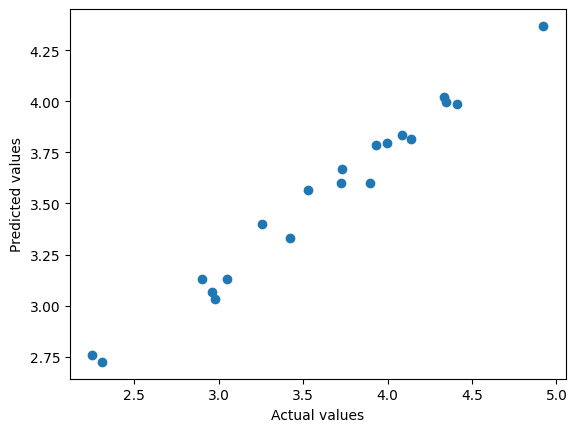

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_csv("/content/bostan housing.zip")
# Generate a dataset
np.random.seed(0)
ZN = np.random.rand(100, 1)
CHAS = 3 * ZN + 2 + np.random.randn(100, 1) / 10

# Split the data into training and testing sets
ZN_train, ZN_test, CHAS_train, CHAS_test = train_test_split(ZN, CHAS, test_size=0.2, random_state=42)

# Create a Lasso regression model
model = Lasso(alpha=0.1)  # alpha is the regularization strength

# Train the model
model.fit(ZN_train, CHAS_train)

# Print coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Make predictions
CHAS_pred = model.predict(ZN_test)

# Plot the predicted values vs actual values
plt.scatter(CHAS_test, CHAS_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.show()

MODEL EVALUATION

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestRegressor # Changed from RandomForestClassifier to RandomForestRegressor
from sklearn.model_selection import cross_val_score
import pandas as pd
df=pd.read_csv("/content/bostan housing.zip")
preprocessed_df = df.copy()
preprocessed_df.dropna(inplace=True)


# Split the preprocessed dataset into features (X) and target (y)
CHAS = preprocessed_df.drop('CHAS', axis=1)
CRIM = preprocessed_df['CRIM']

# Split the data into training and testing sets
CHAS_train, CHAS_test, CRIM_train, CRIM_test = train_test_split(CHAS, CRIM, test_size=0.2, random_state=42)

# Initialize a random forest classifier
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42) # Changed from rf_classifier to rf_regressor

# Train the model on the training data
rf_regressor.fit(CHAS_train, CRIM_train)

# Make predictions on the testing data
CRIM_pred = rf_regressor.predict(CHAS_test)
print(CRIM_pred)


[2.9233600e-02 6.9979100e-02 4.8225020e-01 3.5574600e-02 1.7557600e-01
 5.4011880e-01 8.8306300e-02 4.5313700e-02 8.0110900e-02 2.8654970e-01
 9.2429900e-02 5.6367240e-01 2.5640500e-02 4.2606360e-01 2.4569253e+00
 7.9738200e-02 2.1810326e+00 6.1433500e-02 9.2050967e+00 7.3943336e+00
 7.6697640e-01 2.2575570e-01 9.8179970e+00 1.2745200e-02 8.2709600e-02
 3.2186260e-01 3.9275400e-02 2.7690800e-02 6.9320400e-02 4.5940400e-02
 1.4899700e-02 9.9556715e+00 8.1102533e+00 6.7486637e+00 1.7240800e-01
 5.0272600e-02 1.2199329e+00 5.6107900e-02 5.1553800e-02 9.6678010e-01
 5.6493900e-02 6.7107000e-02 5.6563884e+00 6.6773400e-02 3.7245200e-02
 2.6044170e-01 1.8544100e-02 2.5804928e+01 3.3972200e-01 2.0891670e-01
 1.8930140e-01 4.3498500e-02 1.5863831e+00 5.6222616e+00 1.7932100e-01
 2.3420062e+00 1.8872100e-02 2.2213840e-01 6.5666010e-01 8.0241900e-02
 1.0991170e-01 1.6790240e-01 9.4067589e+00 6.2848340e-01 4.7392077e+01
 4.6762460e-01 6.5405805e+00 3.5474210e-01 1.7364180e-01 1.4088350e-01
 1.471

MODEL TESTING

Model Test Results:
Mean Squared Error: 0.026
R-squared: 0.999


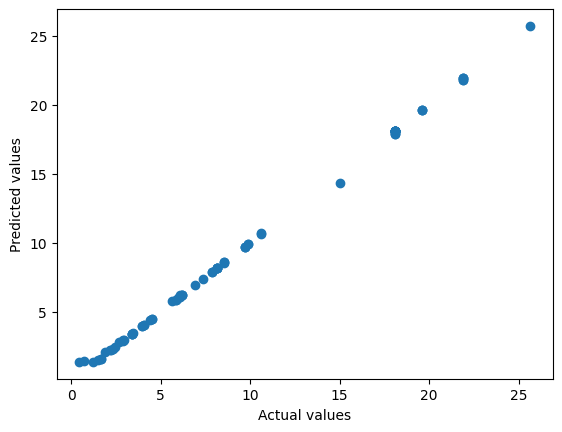

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestRegressor # Changed to RandomForestRegressor for continuous target
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score
df=pd.read_csv("/content/bostan housing.zip")
preprocessed_df = df.copy()
preprocessed_df.dropna(inplace=True)
# Split the preprocessed dataset into features (X) and target (y)
X = preprocessed_df.drop('ZN', axis=1)
y = preprocessed_df['INDUS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a random forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42) # Changed to RandomForestRegressor

# Train the model on the training data
rf_regressor.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_regressor.predict(X_test)

# Evaluate the model - Use appropriate metrics for Regression
# For example - Mean Squared Error, R-squared etc.
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Model Test Results:')
print(f'Mean Squared Error: {mse:.3f}')
print(f'R-squared: {r2:.3f}')

# You can't plot a confusion matrix or calculate ROC AUC for regression tasks.
# Consider using a scatter plot of predicted vs actual values instead.

import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

EVALUATION METRIC

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
df=pd.read_csv("/content/bostan housing.zip")
# Define a function to calculate evaluation metrics
def evaluate_model(y_test, y_pred, y_pred_proba=None):
    if y_pred_proba is not None:
      accuracy = accuracy_score(y_test, y_pred)
      precision = precision_score(y_test, y_pred)
      recall = recall_score(y_test, y_pred)
      f1 = f1_score(y_test, y_pred)
      roc_auc = roc_auc_score(y_test, y_pred_proba)
    else:
      accuracy, precision, recall, f1, roc_auc = None, None, None, None, None

    # Regression metrics (if applicable)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print('Evaluation Metrics:')

    # Print only if calculated
    if accuracy is not None:
      print(f'Accuracy: {accuracy:.3f}')
      print(f'Precision: {precision:.3f}')
      print(f'Recall: {recall:.3f}')
      print(f'F1 Score: {f1:.3f}')
      print(f'ROC AUC Score: {roc_auc:.3f}')

    print(f'Mean Squared Error: {mse:.3f}')
    print(f'Mean Absolute Error: {mae:.3f}')
    print(f'R2 Score: {r2:.3f}')

evaluate_model(y_test, y_pred)

Evaluation Metrics:
Mean Squared Error: 0.026
Mean Absolute Error: 0.064
R2 Score: 0.999


2nd dataset federal reserve

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_csv('/content/federal reserve.zip')

Month = df.drop('Month', axis=1)
Day = df['Month']
# Split the data into training and testing sets
Month_train, Month_test, Day_train, Day_test = train_test_split(Month, Day, test_size=0.3, random_state=40)

# Print the shapes of the splits
print("Month_train shape:", Month_train.shape)
print("Month_test shape:", Month_test.shape)
print("Day_train shape:", Day_train.shape)
print("Day_test shape:", Day_test.shape)

Month_train shape: (632, 9)
Month_test shape: (272, 9)
Day_train shape: (632,)
Day_test shape: (272,)


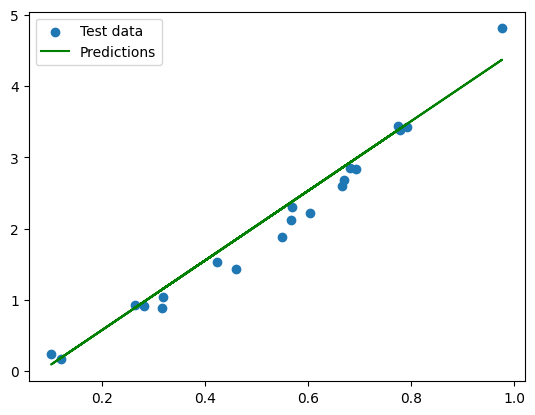

R-squared score: 0.9654420980023098


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('/content/federal reserve.zip')

np.random.seed(0)
Month = np.random.rand(100, 1)
Day = 3 * Month**2 + 2 * Month + np.random.randn(100, 1) / 10

# Split the data into training and testing sets
Month_train, Month_test, Day_train, Day_test = train_test_split(Month, Day, test_size=0.2, random_state=42)

# Create a simple linear regression model (too simple for the complex data)
model = LinearRegression()

# Train the model
model.fit(Month_train, Day_train)

# Plot the results
plt.scatter(Month_test, Day_test, label='Test data')
plt.plot(Month_test, model.predict(Month_test), label='Predictions', color='green')
plt.legend()
plt.show()

# Print the R-squared score (closer to 0 indicates underfitting)
print("R-squared score:", model.score(Month_test,Day_test))

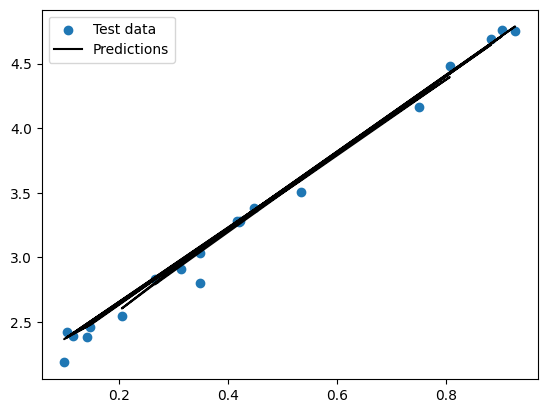

R-squared score: 0.9890812973931169


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('/content/federal reserve.zip')
np.random.seed(1)
Month = np.random.rand(100, 1)
Day = 3 * Month + 2 + np.random.randn(100, 1) / 10

Month_train, Month_test, Day_train, Day_test = train_test_split(Month, Day, test_size=0.2, random_state=42)

pipe = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10)),
    ('linear_regression', LinearRegression())
])
# Train the model
pipe.fit(Month_train, Day_train)

plt.scatter(Month_test, Day_test, label='Test data')
plt.plot(Month_test, pipe.predict(Month_test), label='Predictions', color='black')
plt.legend()
plt.show()

print("R-squared score:", pipe.score(Month_test, Day_test))

   Year  Month  Day  Federal Funds Target Rate  Federal Funds Upper Target  \
0  1954      7    1                        NaN                         NaN   
1  1954      8    1                        NaN                         NaN   
2  1954      9    1                        NaN                         NaN   
3  1954     10    1                        NaN                         NaN   
4  1954     11    1                        NaN                         NaN   

   Federal Funds Lower Target  Effective Federal Funds Rate  \
0                         NaN                          0.80   
1                         NaN                          1.22   
2                         NaN                          1.06   
3                         NaN                          0.85   
4                         NaN                          0.83   

   Real GDP (Percent Change)  Unemployment Rate  Inflation Rate  
0                        4.6                5.8             NaN  
1                   

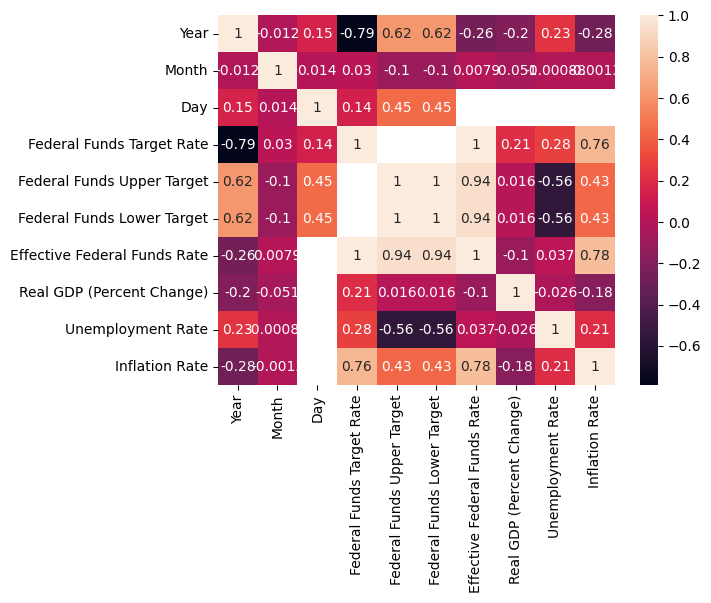

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("/content/federal reserve.zip")
numeric_columns=df.select_dtypes(include=[np.number]).columns
print(df.head())
print(df.shape)
print(df.isnull().sum())
print(df.dtypes)
print(df.describe())
if len(df.select_dtypes(include='object').columns) > 0:
  print(df.describe(include='object'))
corr_matrix=df[numeric_columns].corr()
print(corr_matrix)
sns.heatmap(corr_matrix,annot=True)
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer # Import SimpleImputer
import numpy as np

df = pd.read_csv("/content/federal reserve.zip")
x = df[['Month']]
y = df[['Year']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create an imputer to fill NaN with the mean of each column
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both train and test data
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(x_train, y_train)
y_pred = rf_regressor.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", np.sqrt(mse))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Squared Error: 304.6214023671145
Root Mean Squared Error: 17.4534066120948


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Feature importances: [1.]


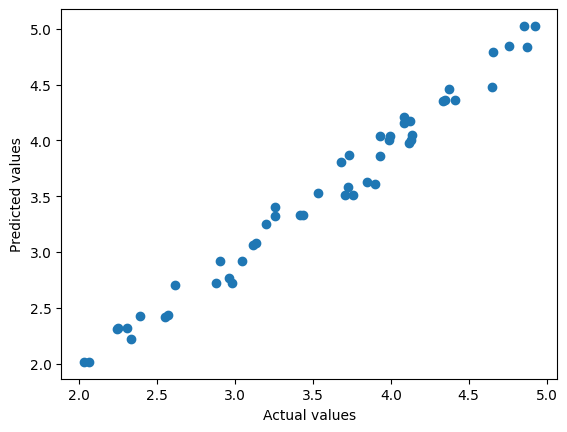

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_csv("/content/federal reserve.zip")
np.random.seed(0)
Month = np.random.rand(100, 1)
Day = 3 * Month + 2 + np.random.randn(100, 1) / 10

Month_train, Month_test, Day_train, Day_test = train_test_split(Month, Day, test_size=0.5, random_state=42)

model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)

model.fit(Month_train,Day_train)

print("Feature importances:", model.feature_importances_)

Day_pred = model.predict(Month_test)

plt.scatter(Day_test, Day_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Intercept: [2.01111939]
Coefficients: [[3.00602571]]


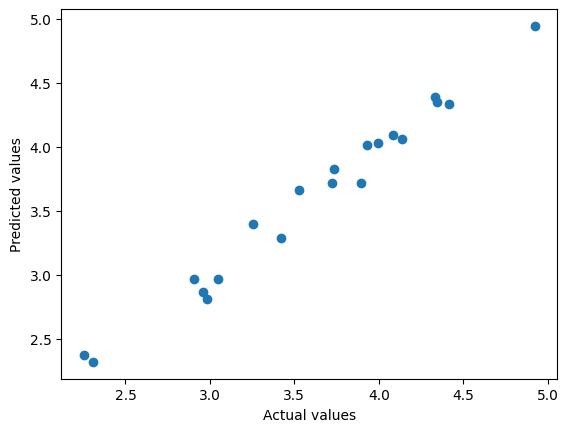

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
df=pd.read_csv("/content/federal reserve.zip")
np.random.seed(0)
Month = np.random.rand(100, 1)
Day = 3 * Month + 2 + np.random.randn(100, 1) / 10

Month_train, Month_test, Day_train, Day_test = train_test_split(Month, Day, test_size=0.2, random_state=42)

model = SVR(kernel='linear', C=1e3)

model.fit(Month_train, Day_train)

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Day_pred = model.predict(Month_test)

plt.scatter(Day_test, Day_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.show()

Intercept: [2.53316631]
Coefficients: [1.87976958]


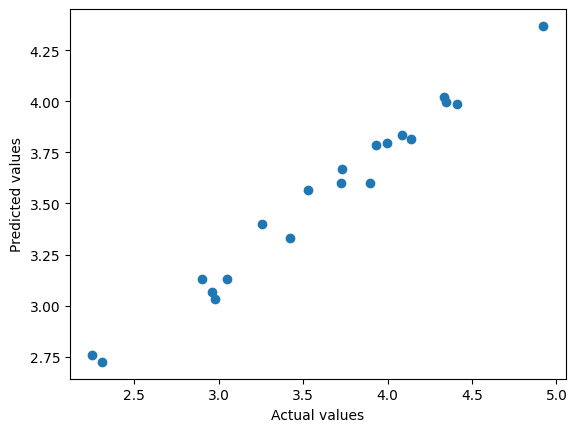

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_csv("/content/federal reserve.zip")
# Generate a dataset
np.random.seed(0)
Month = np.random.rand(100, 1)
Day = 3 * Month + 2 + np.random.randn(100, 1) / 10

# Split the data into training and testing sets
Month_train, Month_test, Day_train, Day_test = train_test_split(Month, Day, test_size=0.2, random_state=42)

# Create a Lasso regression model
model = Lasso(alpha=0.1)  # alpha is the regularization strength

# Train the model
model.fit(Month_train, Day_train)

# Print coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Make predictions
Day_pred = model.predict(Month_test)

# Plot the predicted values vs actual values
plt.scatter(Day_test, Day_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
df=pd.read_csv("/content/federal reserve.zip")
# Define a function to calculate evaluation metrics
def evaluate_model(y_test, y_pred, y_pred_proba=None): # Added optional y_pred_proba
    # Classification metrics

    if y_pred_proba is not None:
      accuracy = accuracy_score(y_test, y_pred)
      precision = precision_score(y_test, y_pred)
      recall = recall_score(y_test, y_pred)
      f1 = f1_score(y_test, y_pred)
      roc_auc = roc_auc_score(y_test, y_pred_proba)
    else:
      accuracy, precision, recall, f1, roc_auc = None, None, None, None, None # Set to None if not applicable

    # Regression metrics (if applicable)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print('Evaluation Metrics:')

    # Print only if calculated
    if accuracy is not None:
      print(f'Accuracy: {accuracy:.3f}')
      print(f'Precision: {precision:.3f}')
      print(f'Recall: {recall:.3f}')
      print(f'F1 Score: {f1:.3f}')
      print(f'ROC AUC Score: {roc_auc:.3f}')

    print(f'Mean Squared Error: {mse:.3f}')
    print(f'Mean Absolute Error: {mae:.3f}')
    print(f'R2 Score: {r2:.3f}')

evaluate_model(y_test, y_pred)

Evaluation Metrics:
Mean Squared Error: 304.621
Mean Absolute Error: 14.605
R2 Score: -0.025
